In [90]:
!pip install sklearn

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 8.3 MB 3.5 MB/s eta 0:00:01
    Running setup.py install for sklearn ... done


In [92]:
!pip install catboost

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.6 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.1 MB 939 kB/s eta 0:00:01
    Running setup.py install for retrying ... done


In [1]:
import pandas as pd

In [2]:
pd.options.display.max_columns = None

In [3]:
train = pd.read_csv('train-dec-mar.csv', sep=';', decimal=',')

In [4]:
train.head()

,User_id,Credit_id,Count_months,Amount,Month_payment,Payed,Left,Planned,Credit_taken,Pay_date
0,196,6,7,1000,100,100.0,0.0,100,18.12.2019 23:55,18.02.2020
1,227,20,7,500,50,50.0,0.0,50,20.12.2019 5:40,20.02.2020
2,238,22,7,500,50,50.0,0.0,50,20.12.2019 10:45,20.02.2020
3,45,24,26,5000,167,334.0,0.0,167,20.12.2019 14:59,20.02.2020
4,123,26,28,5000,167,0.0,167.0,167,20.12.2019 16:56,20.02.2020


In [127]:
#train.Payed.hist(bins=10, range = (0,1000));

In [5]:
left_train = sum((train.Left))
print(left_train)

17734.06


In [6]:
Actually_payed_train = sum(train.Payed)
print(Actually_payed_train)

42329.66


In [7]:
Planned_train = sum(train.Planned)
print(Planned_train)

60233


In [8]:
Delta_train = Planned_train - left_train - Actually_payed_train
print(Delta_train)

169.28


In [40]:
test = pd.read_csv('test-april.csv', sep=';', decimal=',')

In [41]:
test.head()

,User_id,Credit_id,Count_months,Amount,Month_payment,Payed,Left,Planned,Credit_taken,Pay_date
0,196,6,6,1000,100,0.0,100.0,100,18.12.2019 23:55,18.04.2020
1,227,20,7,500,50,0.0,50.0,50,20.12.2019 5:40,19.04.2020
2,238,22,7,500,50,0.0,50.0,50,20.12.2019 10:45,20.04.2020
3,45,24,26,5000,167,0.0,167.0,167,20.12.2019 14:59,20.04.2020
4,123,26,28,5000,167,0.0,167.0,167,20.12.2019 16:56,20.04.2020


In [42]:
test.shape

(1038, 10)

In [43]:
train.shape

(1120, 10)

In [44]:
Planned_in_april = sum(test.Planned)
print(Planned_in_april)

46885


In [45]:
Actually_payed_april = sum(test.Payed)
print(Actually_payed_april)

1010.29


In [46]:
left_april = sum((test.Left).astype(float))
print(left_april)

36538.5


In [36]:
Delta_test = Planned_in_april - left_april - Actually_payed_april
print(Delta_test)

9336.21


In [18]:
train.columns

Index([u'User_id', u'Credit_id', u'Count_months', u'Amount', u'Month_payment',
       u'Payed', u'Left', u'Planned', u'Credit_taken', u'Pay_date'],
      dtype='object')

In [19]:
# предскажем катбустом

0:	learn: 54.7957628	total: 1.65ms	remaining: 329ms
1:	learn: 52.7349705	total: 2.71ms	remaining: 268ms
2:	learn: 51.1654531	total: 3.75ms	remaining: 246ms
3:	learn: 49.6502789	total: 4.65ms	remaining: 228ms
4:	learn: 48.3129351	total: 7.48ms	remaining: 292ms
5:	learn: 47.0502339	total: 8.45ms	remaining: 273ms
6:	learn: 46.0241347	total: 9.02ms	remaining: 249ms
7:	learn: 45.1291869	total: 9.6ms	remaining: 230ms
8:	learn: 44.3809951	total: 10.1ms	remaining: 215ms
9:	learn: 43.6541218	total: 10.7ms	remaining: 204ms
10:	learn: 42.9066195	total: 11.2ms	remaining: 193ms
11:	learn: 42.2575961	total: 11.7ms	remaining: 184ms
12:	learn: 41.8971133	total: 12.3ms	remaining: 177ms
13:	learn: 41.4585442	total: 12.9ms	remaining: 171ms
14:	learn: 41.0169538	total: 13.4ms	remaining: 166ms
15:	learn: 40.5568383	total: 14ms	remaining: 161ms
16:	learn: 40.1535371	total: 14.5ms	remaining: 156ms
17:	learn: 39.8798531	total: 15.2ms	remaining: 154ms
18:	learn: 39.6155806	total: 15.7ms	remaining: 150ms
19:	le

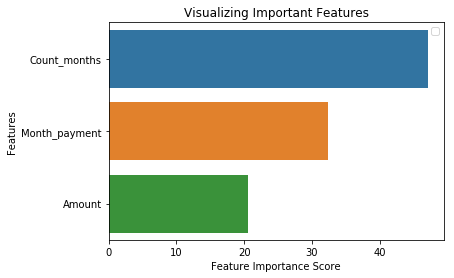

('\xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbf\xd0\xbe\xd0\xbb\xd0\xbe\xd0\xb6\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe \xd0\xb2\xd1\x81\xd0\xb5\xd0\xb3\xd0\xbe \xd0\xb2\xd1\x8b\xd0\xbf\xd0\xbb\xd0\xb0\xd1\x82\xd1\x8f\xd1\x82 \xd0\xb7\xd0\xb0 \xd0\xb0\xd0\xbf\xd1\x80\xd0\xb5\xd0\xbb\xd1\x8c: ', 27242.568146676822)


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
# initialize data
features = ['Count_months', 'Amount', 'Month_payment']

#lab_enc = preprocessing.LabelEncoder()
#df_target = df_investors.TotalPays.copy()
#encoded = lab_enc.fit_transform(df_target)

#X_train, X_val, y_train, y_val = train_test_split(df_investors[features], encoded, test_size=0.3)

X_train = train[features]
X_val = test[features]
y_train = train.Payed.copy()
y_val = test.Payed.copy()

model=CatBoostRegressor(iterations=200, depth=5, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train)
preds = model.predict(X_val)
feature_imp = pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#plt.plot(y_val, label = 'actual')
# Plot the predicted values
#plt.plot(preds, label = 'prediction')
#plt.xticks(rotation = '60'); 
#plt.legend()
 
#print("предположительно всего выплатят за март: ", preds, '\n')
print("предположительно всего выплатят за апрель: ", sum(preds))


In [95]:
# пробуем предсказать случайным лесом

('\xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbf\xd0\xbe\xd0\xbb\xd0\xbe\xd0\xb6\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe \xd0\xb2\xd1\x81\xd0\xb5\xd0\xb3\xd0\xbe \xd0\xb2\xd1\x8b\xd0\xbf\xd0\xbb\xd0\xb0\xd1\x82\xd1\x8f\xd1\x82 \xd0\xb7\xd0\xb0 \xd0\xb0\xd0\xbf\xd1\x80\xd0\xb5\xd0\xbb\xd1\x8c: ', 29535)


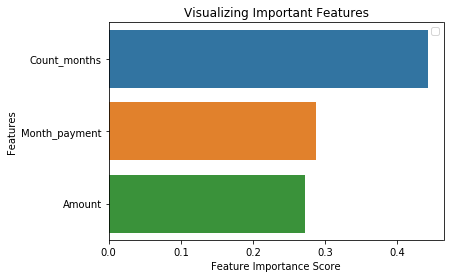

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
features = ['Count_months', 'Amount', 'Month_payment']

X_train = train[features]
X_val = test[features]
y_train = train.Payed.astype('int64').copy()
y_val = test.Payed.astype('int64').copy()

clf = ensemble.RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

#print("предположительно всего выплатят за март: ", y_pred, '\n')
print("предположительно всего выплатят за апрель: ", sum(y_pred))

feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [98]:
#Предскажем деревом решений

In [32]:
from sklearn.tree import DecisionTreeClassifier

y = train.Payed.astype('int64').copy()
x = train[features]
x_val = test[features]
y_val = test.Payed.astype('int64').copy()

model = DecisionTreeClassifier()
model.fit(x,y)
proba = model.predict(x_val)

print("предположительно всего выплатят за апрель: ", sum(proba))

('\xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbf\xd0\xbe\xd0\xbb\xd0\xbe\xd0\xb6\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe \xd0\xb2\xd1\x81\xd0\xb5\xd0\xb3\xd0\xbe \xd0\xb2\xd1\x8b\xd0\xbf\xd0\xbb\xd0\xb0\xd1\x82\xd1\x8f\xd1\x82 \xd0\xb7\xd0\xb0 \xd0\xb0\xd0\xbf\xd1\x80\xd0\xb5\xd0\xbb\xd1\x8c: ', 28855)
